In [1]:
import npc_lims
#get list of all sessions with ephys data
all_ephys_sessions = tuple(s for s in npc_lims.get_session_info(is_ephys=True))

import dynamicrouting_summary as dr
import pandas as pd
#Get dictionaries
dfs: dict[str, pd.DataFrame] = dr.get_dfs

In [2]:
dfs = dr.get_dfs()
dfs

LazyDict(keys=['session', 'subject', 'epochs', 'trials', 'performance', 'vis_rf_mapping', 'aud_rf_mapping', 'optotagging', 'invalid_times', 'devices', 'electrode_groups', 'electrodes'])

In [3]:
#Get number of subjects that went through ephys and were templeton 

subject = dfs['subject']
subject
templetonsubjects = subject.query('is_templeton & is_ephys')
uniquesubjectstempleton = pd.unique(templetonsubjects['subject_id'])
len(uniquesubjectstempleton)

12

In [4]:
#Get number of subjects that went through ephys and were DR 
dfs = dr.get_dfs()
subject = dfs['subject']
subject
drsubjects = subject.query('is_dynamic_routing & is_ephys')
uniquesubjectsdr = pd.unique(drsubjects['subject_id'])
len(uniquesubjectsdr)

18

In [5]:
#Find all genotypes of DR subjects
subject = dfs['subject']
drsubjects = subject.query('is_dynamic_routing & is_ephys')
pd.unique(drsubjects['genotype'])


array(['wt/wt', 'VGAT-ChR2-YFP/wt',
       'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
       'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
       'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt'], dtype=object)

In [6]:
#Distribution of genotypes DR subjects

#VGAT DR subjects
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drvgatsubjects = drsubjects.query('`genotype`.str.contains("VGAT")')
drvgatsubjects
numberofdrvgatsubjects = pd.unique(drvgatsubjects['subject_id'])

#SST DR subjects
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drsstsubjects = drsubjects.query('`genotype`.str.contains("Sst")')
drsstsubjects
numberofdrsstsubjects = pd.unique(drsstsubjects['subject_id'])

#Pvalb DR subjects
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drpvalbsubjects = drsubjects.query('`genotype`.str.contains("Pvalb")')
drpvalbsubjects
numberofdrpvalbsubjects = pd.unique(drpvalbsubjects['subject_id'])

#VIP DR subjects
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drvipsubjects = drsubjects.query('`genotype`.str.contains("Vip")')
drvipsubjects
numberofdrvipsubjects = pd.unique(drvipsubjects['subject_id'])

#wt/wt DR subjects
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drwtsubjects = drsubjects.query('`genotype`.str.contains("wt/wt")')
drwtsubjects
numberofdrwtsubjects = pd.unique(drwtsubjects['subject_id'])

dr_wt = len(numberofdrwtsubjects)
dr_vip = len(numberofdrvipsubjects)
dr_pvalb = len(numberofdrpvalbsubjects)
dr_sst = len(numberofdrsstsubjects)
dr_vgat = len(numberofdrvgatsubjects)



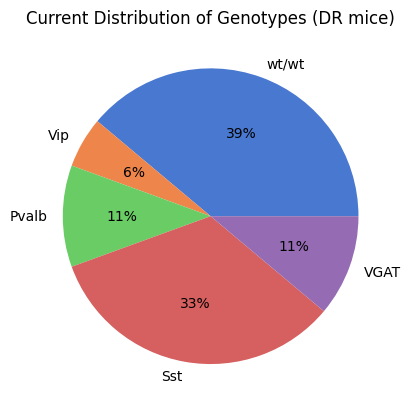

In [7]:
#Make a pie chart plotting number of DR subjects with different genotypes
import matplotlib.pyplot as plt
import seaborn as sns

data = [dr_wt, dr_vip, dr_pvalb, dr_sst, dr_vgat]
keys = ['wt/wt', 'Vip', 'Pvalb', 'Sst','VGAT']

palette_color = sns.color_palette('muted')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Current Distribution of Genotypes (DR subjects)')
plt.show()

In [8]:
#Find all genotypes of templeton subjects
subject = dfs['subject']
templetonsubjects = subject.query('is_templeton & is_ephys')
pd.unique(templetonsubjects['genotype'])

array(['wt/wt', 'VGAT-ChR2-YFP/wt'], dtype=object)

In [9]:
#Distribution of genotypes Templeton subjects

#VGAT Templeton subjects
templetonsubjects = subject.query('is_templeton & is_ephys')
tvgatsubjects = templetonsubjects.query('`genotype`.str.contains("VGAT")')
tvgatsubjects
numberoftvgatsubjects = pd.unique(tvgatsubjects['subject_id'])

#wt/wt Templeton subjects
templetonsubjects = subject.query('is_templeton & is_ephys')
twtsubjects = templetonsubjects.query('`genotype`.str.contains("wt/wt")')
twtsubjects
numberoftwtsubjects = pd.unique(twtsubjects['subject_id'])

t_wt = len(numberoftwtsubjects)
t_vgat = len(numberoftvgatsubjects)


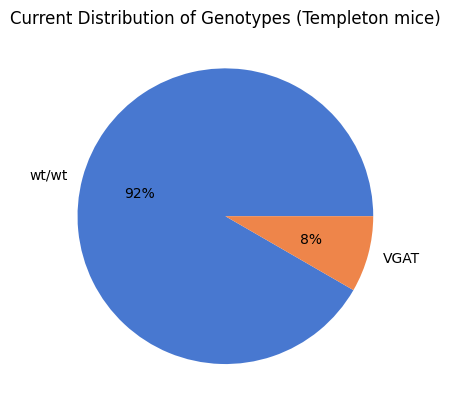

In [10]:
#Make a pie chart plotting number of Templeton subjects with different genotypes
import matplotlib.pyplot as plt
import seaborn as sns

data = [t_wt, t_vgat]
keys = ['wt/wt', 'VGAT']

palette_color = sns.color_palette('muted')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Current Distribution of Genotypes (Templeton subjects)')
plt.show()

In [11]:
#Find number of DR subjects with tones
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drtones = drsession.query('`stimulus_notes`.str.contains("tone")')
uniquedrtones = pd.unique(drtones['subject_id'])
len(uniquedrtones)

2

In [12]:
# Find number of Templeton subjects with AMN
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonAMN = templetonsession.query('`stimulus_notes`.str.contains("AMN")')
uniquetempletonAMN = pd.unique(templetonAMN['subject_id'])
len(uniquetempletonAMN)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_21088\3817627129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


3

In [21]:
#Find number of DR subjects with AMN
session = dfs['session']
drsession = session.query('is_dynamic_routing & is_ephys')
drAMN = drsession.query('`stimulus_notes`.str.contains("AMN")')
uniquedrAMN = pd.unique(drAMN['subject_id'])
len(uniquedrAMN)


,session_description,identifier,session_start_time,timestamps_reference_time,keywords,epoch_tags,experiment_description,session_id,lab,institution,...,source_script_file_name,stimulus_notes,session_idx,date,subject_id,is_ephys,is_templeton,is_training,is_dynamic_routing,is_opto
1023,ecephys session (day 1) with behavioral task d...,d06c2e94-526c-43e9-a83d-b8b6de844596,2022-08-15 11:22:17-07:00,2022-08-15 11:22:17-07:00,"[task, sync, video, ephys, experiment day=1, b...","[rewards, DynamicRouting1, RFMapping]",visual-auditory task-switching behavior experi...,626791_2022-08-15_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,stage 5 ori tone,0,2022-08-15,626791,True,False,False,True,False
1024,ecephys session (day 2) with behavioral task d...,21bc71db-4e77-47ce-8982-6461fdd65126,2022-08-16 12:42:51-07:00,2022-08-16 12:42:51-07:00,"[task, sync, video, ephys, experiment day=2, b...","[rewards, DynamicRouting1, RFMapping]",visual-auditory task-switching behavior experi...,626791_2022-08-16_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,stage 5 tone ori,0,2022-08-16,626791,True,False,False,True,False
1025,ecephys session (day 3) with behavioral task d...,eb9e0099-2871-4b1b-b879-526d0ca8ed12,2022-08-17 13:24:54-07:00,2022-08-17 13:24:54-07:00,"[task, sync, video, ephys, experiment day=3, b...","[DynamicRouting1, rewards, RFMapping]",visual-auditory task-switching behavior experi...,626791_2022-08-17_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,stage 5 ori tone,0,2022-08-17,626791,True,False,False,True,False
1735,ecephys session (day 1) with behavioral task d...,d1d2c4b0-8296-48fd-843e-9941d4727e7f,2023-01-23 11:50:21-08:00,2023-01-23 11:50:21-08:00,"[task, sync, video, ephys, opto, experiment da...","[RFMapping, opto, DynamicRouting1, rewards]",visual-auditory task-switching behavior experi...,636766_2023-01-23_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,opto 3 ori tone,0,2023-01-23,636766,True,False,False,True,True
1736,ecephys session (day 2) with behavioral task d...,631d4900-062a-4ede-93a0-f4edb627e355,2023-01-24 11:59:01-08:00,2023-01-24 11:59:01-08:00,"[task, sync, video, ephys, opto, experiment da...","[opto, RFMapping, rewards, DynamicRouting1]",visual-auditory task-switching behavior experi...,636766_2023-01-24_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,opto 3 tone ori,0,2023-01-24,636766,True,False,False,True,True
1737,ecephys session (day 3) with behavioral task d...,a3326f94-1881-4351-a213-3fedecedcb8c,2023-01-25 12:48:18-08:00,2023-01-25 12:48:18-08:00,"[task, sync, video, ephys, opto, experiment da...","[opto, DynamicRouting1, rewards, RFMapping]",visual-auditory task-switching behavior experi...,636766_2023-01-25_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,opto 3 ori tone,0,2023-01-25,636766,True,False,False,True,True
1738,ecephys session (day 4) with behavioral task d...,b90d94d8-3ec1-445e-b603-66b43b02eb69,2023-01-26 14:30:42-08:00,2023-01-26 14:30:42-08:00,"[task, sync, video, ephys, opto, experiment da...","[opto, RFMapping, DynamicRouting1, rewards]",visual-auditory task-switching behavior experi...,636766_2023-01-26_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,opto 3 tone ori,0,2023-01-26,636766,True,False,False,True,True
2589,ecephys session (day 1) with behavioral task d...,686776ef-79ed-41a0-8d21-224aadfe8c55,2023-01-30 16:39:35-08:00,2023-01-30 16:39:35-08:00,"[task, sync, video, ephys, experiment day=1, b...","[DynamicRouting1, RFMapping, rewards]",visual-auditory task-switching behavior experi...,644864_2023-01-30_0,NP3,Neural Circuits & Behavior | MindScope pro

In [14]:
#Find number of Templeton subjects with tones
session = dfs['session']
templetonsession = session.query('is_templeton & is_ephys')
templetonsession
templetonsession.dropna(inplace=True)
templetones = templetonsession.query('~`stimulus_notes`.str.contains("AMN")')
uniquetempletones = pd.unique(templetones['subject_id'])
len(uniquetempletones)


C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_21088\723098639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


9

In [15]:
#Get number of vis type (moving) for DR subjects
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drmoving = drsession.query('`stimulus_notes`.str.contains("moving")')
uniquedrmoving = pd.unique(drmoving['subject_id'])
len(uniquedrmoving)

16

In [16]:
#Get number of vis type (static) for DR subjects
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drstatic = drsession.query('~`stimulus_notes`.str.contains("moving")')
uniquedrstatic = pd.unique(drstatic['subject_id'])
len(uniquedrstatic)

2

In [22]:
#Get number of vis type (moving) for Templeton subjects
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonmoving = templetonsession.query('`stimulus_notes`.str.contains("DG")')
uniquetempletonmoving = pd.unique(templetonmoving['subject_id'])
len(uniquetempletonmoving)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_21088\4075432480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


,session_description,identifier,session_start_time,timestamps_reference_time,keywords,epoch_tags,experiment_description,session_id,lab,institution,...,source_script_file_name,stimulus_notes,session_idx,date,subject_id,is_ephys,is_templeton,is_training,is_dynamic_routing,is_opto
409,ecephys session (day 1) with behavioral task d...,a351adc5-46b8-4885-985f-07c41608f231,2022-07-26 14:08:55-07:00,2022-07-26 14:08:55-07:00,"[task, sync, video, ephys, Templeton, experime...","[DynamicRouting1, rewards]",sensory discrimination task experiment with ta...,620263_2022-07-26_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 vis maxvol,0,2022-07-26,620263,True,True,False,False,False
410,ecephys session (day 2) with behavioral task d...,ac56cf61-85cc-402f-a4f8-9e693f334bec,2022-07-27 13:56:52-07:00,2022-07-27 13:56:52-07:00,"[task, sync, video, ephys, Templeton, experime...","[rewards, DynamicRouting1]",sensory discrimination task experiment with ta...,620263_2022-07-27_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 vis maxvol,0,2022-07-27,620263,True,True,False,False,False
411,ecephys session (day 1) with behavioral task d...,c0ff459a-bc14-44a4-b65a-9756a223604c,2022-08-02 15:39:59-07:00,2022-08-02 15:39:59-07:00,"[task, sync, video, ephys, Templeton, experime...","[DynamicRouting1, rewards]",sensory discrimination task experiment with ta...,620264_2022-08-02_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 aud record,0,2022-08-02,620264,True,True,False,False,False
1138,ecephys session (day 1) with behavioral task d...,733932d5-7692-4cb2-9b71-3f26b2510816,2022-09-19 13:47:54-07:00,2022-09-19 13:47:54-07:00,"[task, sync, video, ephys, Templeton, experime...","[DynamicRouting1, RFMapping, rewards]",sensory discrimination task experiment with ta...,628801_2022-09-19_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 vis rewardProb,0,2022-09-19,628801,True,True,False,False,False
1549,ecephys session (day 1) with behavioral task d...,ecbc9ae9-ff4e-43bb-a79a-703b2f529aaf,2022-09-26 12:47:50-07:00,2022-09-26 12:47:50-07:00,"[task, sync, video, ephys, Templeton, experime...","[RFMapping, rewards, DynamicRouting1]",sensory discrimination task experiment with ta...,636397_2022-09-26_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 aud rewardProb,0,2022-09-26,636397,True,True,False,False,False
1550,ecephys session (day 2) with behavioral task d...,64ee5e81-ff64-40f2-bc6f-a1c97b57f0e0,2022-09-27 11:36:50-07:00,2022-09-27 11:36:50-07:00,"[task, sync, video, ephys, Templeton, experime...","[RFMapping, rewards, DynamicRouting1]",sensory discrimination task experiment with ta...,636397_2022-09-27_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 aud rewardProb,0,2022-09-27,636397,True,True,False,False,False
2340,and ecephys session (day 1) with behavioral t...,a0d2ab2b-d383-4641-a4ca-6f118b9b0950,2022-12-05 13:07:55-08:00,2022-12-05 13:07:55-08:00,"[task, sync, ephys, Templeton, experiment day=1]","[RFMapping, rewards, DynamicRouting1]",sensory discrimination task experiment with ta...,644547_2022-12-05_0,NP3,Neural Circuits & Behavior | MindScope program...,...,https://github.com/AllenInstitute/npc_sessions...,templeton stage 2 vis DG AMN,0,2022-12-05,644547,True,True,False,False,False
2341,and ecephys session (day 2) with behavioral t...,7ab482c0-80da-49b0-93ea-eca5db1b0072,2022-12-06 12:35:29-08:00,2022-12-06 12:35:29-08:00,"[task, sync, ephys, Templeton, experiment day=2]","[DynamicRouting1, RFMapping, rewards]",sensory discrimination task experiment with ta...,644547_2022-12-06_0,NP3,Ne

In [18]:
#Get number of vis type (static) for Templeton subjects
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonstatic = templetonsession.query('~`stimulus_notes`.str.contains("DG")')
uniquetempletonstatic = pd.unique(templetonstatic['subject_id'])
len(uniquetempletonstatic)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_21088\1176660196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


9

In [19]:
#Get info about ephys sessions with issues/weird data
ephys_sessions_with_issues = [s for s in npc_lims.get_session_info(is_ephys=True) if s.issues]
ephys_sessions_with_issues
len(ephys_sessions_with_issues)

drissues = [x for x in ephys_sessions_with_issues if x.project=='DynamicRouting']
len(drissues)

9

In [20]:
templetonissues = [x for x in ephys_sessions_with_issues if x.project=='TempletonPilotSession']
len(templetonissues)

5